In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing # scale and center data
import matplotlib.colors as colors
import seaborn as sns
#Metrics
from sklearn.metrics import accuracy_score,precision_score
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pd.set_option('display.max_columns', None)

df = pd.read_csv('train.csv', encoding='cp1252')
df.replace(to_replace=[np.nan, "NA"], value=0, inplace=True)

In [2]:
#2
import numpy as np
int64_bool = df.apply(lambda x: (True if x.dtype == np.int64 else False),axis = 0)
df = df[df.columns[int64_bool]]


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_732\2574981091.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(eliminate, 1, inplace=True)


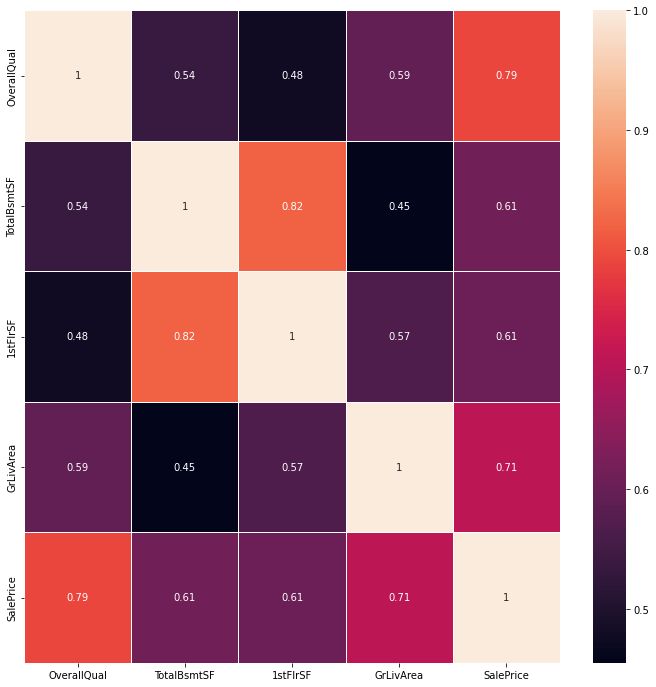

In [3]:
#2
import matplotlib.pyplot as plt

#'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFullBath', 'Fireplaces', 'WoodDeckSF', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'MSSubClass', 'LotArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath'

eliminate = ['Id', 'GarageArea', 'GarageCars', 'TotRmsAbvGrd', 'OpenPorchSF', '2ndFlrSF',  'KitchenAbvGr', 'EnclosedPorch', 'OverallCond', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFullBath', 'Fireplaces', 'WoodDeckSF', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'MSSubClass', 'LotArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath']
df.drop(eliminate, 1, inplace=True)
corrMatrix = df.corr()

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [4]:
# Numero 4
minPrice = df['SalePrice'].min()
maxPrice = df['SalePrice'].max()
avg = (maxPrice - minPrice) / 3
df['Clasificacion'] = df['SalePrice']

df['Clasificacion'][df['SalePrice'] < minPrice + avg] = 0
df['Clasificacion'][df['SalePrice'] >= minPrice + avg] = 1
df['Clasificacion'][df['SalePrice'] >= minPrice + avg * 2] = 2
df

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,SalePrice,Clasificacion
0,7,856,856,1710,208500,0
1,6,1262,1262,1262,181500,0
2,7,920,920,1786,223500,0
3,7,756,961,1717,140000,0
4,8,1145,1145,2198,250000,0
...,...,...,...,...,...,...
1455,6,953,953,1647,175000,0
1456,6,1542,2073,2073,210000,0
1457,7,1152,1188,2340,266500,0
1458,5,1078,1078,1078,142125,0


In [5]:
""" df['Cara'] = df['Clasificacion']
df['Cara'][df['Clasificacion'] == 2] = 1
df['Cara'][df['Clasificacion'] != 2] = 0
df['Media'] = df['Clasificacion']
df['Media'][df['Clasificacion'] == 1] = 1
df['Media'][df['Clasificacion'] != 1] = 0
df['Economica'] = df['Clasificacion']
df['Economica'][df['Clasificacion'] == 0] = 1
df['Economica'][df['Clasificacion'] != 0] = 0
df """

" df['Cara'] = df['Clasificacion']\ndf['Cara'][df['Clasificacion'] == 2] = 1\ndf['Cara'][df['Clasificacion'] != 2] = 0\ndf['Media'] = df['Clasificacion']\ndf['Media'][df['Clasificacion'] == 1] = 1\ndf['Media'][df['Clasificacion'] != 1] = 0\ndf['Economica'] = df['Clasificacion']\ndf['Economica'][df['Clasificacion'] == 0] = 1\ndf['Economica'][df['Clasificacion'] != 0] = 0\ndf "

In [6]:
# Numero 5 y 6
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
import random

salePrice = df.pop('SalePrice')
df['Clasificacion'] = df['Clasificacion'].astype('category')
clasificacion = df.pop('Clasificacion') 

Y = clasificacion
X = df #El resto de los datos

X_train, X_test,y_train, y_test = train_test_split(X, Y,test_size=0.3, train_size=0.7, random_state=10)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


D:\Program Files\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


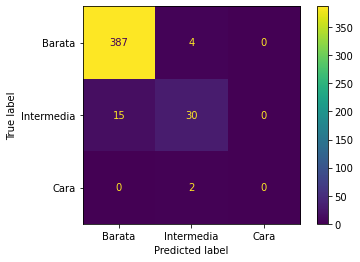

In [7]:
clf_svm = SVC(kernel='linear', C=1, gamma=1)
modelo_1 =clf_svm.fit(X_train_scaled, y_train)
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test, 
                      display_labels=["Barata", "Intermedia", "Cara"])

D:\Program Files\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


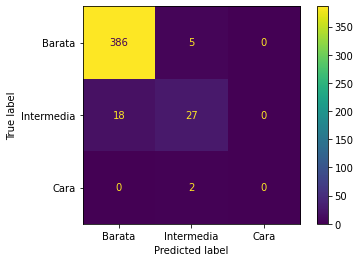

In [8]:
clf_svm = SVC(kernel='poly', C=0.5, gamma='scale')
modelo_2 = clf_svm.fit(X_train_scaled, y_train)
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test, 
                      display_labels=["Barata", "Intermedia", "Cara"])

D:\Program Files\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


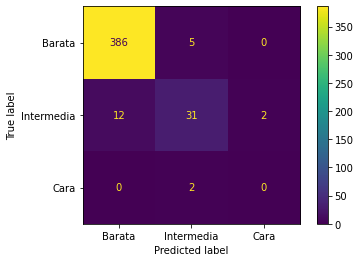

In [9]:
clf_svm = SVC(kernel='rbf', C=10, gamma='auto')
modelo_3 = clf_svm.fit(X_train_scaled, y_train)

plot_confusion_matrix(
    clf_svm,
    X_test_scaled,
    y_test,
    display_labels=["Barata", "Intermedia", "Cara"]
)


In [10]:
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['linear', 'poly', 'rbf']
  },
]
## NOTE: We are includeing C=1 and gamma=1/(num_features * X_train_scaled.var())
## as possible choices since they are the default values.
## ALSO NOTE: Because X_train_scaled.var() = 1 [remember, X_train_scaled = scale(X_train)],
## 1/(num_features * X_train_scaled.var()) = 1/num_features

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='accuracy', # NOTE: The default value for scoring results in worse performance...
        ## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(X_train_scaled, y_train)
optimal_params.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

D:\Program Files\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


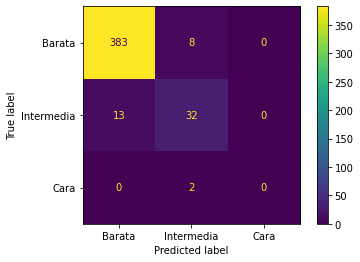

In [11]:
clf_svm = SVC(kernel='rbf', C=100, gamma=0.01)
modelo_3 = clf_svm.fit(X_train_scaled, y_train)

plot_confusion_matrix(
    clf_svm,
    X_test_scaled,
    y_test,
    display_labels=["Barata", "Intermedia", "Cara"]
)

Accuracy:  0.9474885844748858
Precision:  0.9474885844748858
Recall:  0.9474885844748858
F1:  0.9474885844748858
Matriz de confusión
 [[383   8   0]
 [ 13  32   0]
 [  0   2   0]]


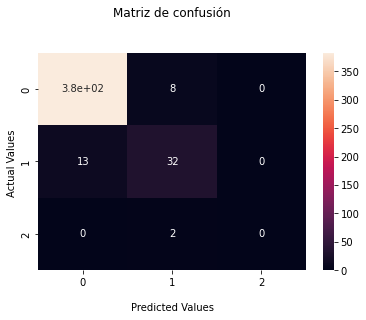

In [16]:
y_pred = modelo_3.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)
cm = confusion_matrix(y_test, y_pred)
print('Matriz de confusión\n', cm)
graf = sns.heatmap(cm, annot=True)
graf.set_title('Matriz de confusión\n\n')
graf.set_xlabel('\nPredicted Values')
graf.set_ylabel('Actual Values ')
plt.show()